In [1]:
# Date: 04/04/2021
# Location: Imaging Mind Architecture Lab, Trinity College Dublin
# Unsupervised classification

# Loading all the libraries

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing, decomposition, manifold

%matplotlib inline


In [2]:
# Data Directory

# Path to data in my PC
path = 'C:\\Users\\theab\\OneDrive\\Documents\\Trinity Dublin\\MSc Neuroscience\\Courses\\PRJ - final\\Project\\WHMSTS\\Code and Results\\Files\\Common\\Templates and Inputs\\Data.xlsx'

data = pd.read_excel(path)

# Participants
participants = data['ID']

# Defining parameters
features = np.array(['T1_SRS2_Awr', 'T1_SRS2_Cog', 'T1_SRS2_Com', 'T1_SRS2_Mot', 'T1_SRS2_RRB'])

# Group labels (For easy plotting)
groups = data['Group']
groups.replace(1, 0,inplace=True) # ASD Group
groups.replace(2, 1,inplace=True) # Non-ASD Group

data.head()


,S. No.,ID,Group,Inclusion,Gender,WASIFISQ4,Age,ADOSModule,ADOS3_SATotal,ADOS3_RRBTotal,...,T1_PRMPCD,T1_PRMPCI,T1_SSPFSL,T1_VRMDRTC,T2_PRMMCLD,T2_PRMMCLI,T2_PRMPCD,T2_PRMPCI,T2_SSPFSL,T2_VRMDRTC
0,0,1001,0,1,2,92.0,13.96,3.0,15.0,2.0,...,66.67,100.00,5.0,33.0,1777.92,1055.17,100.0,100.0,5.0,30.0
1,2,1003,0,1,1,87.0,16.17,3.0,11.0,0.0,...,100.00,100.00,7.0,31.0,1880.67,1700.67,75.0,100.0,8.0,33.0
2,3,1004,0,1,1,113.0,14.67,3.0,10.0,0.0,...,100.00,91.67,9.0,36.0,1903.92,1211.08,100.0,100.0,9.0,33.0
3,8,1009,1,2,2,116.0,16.67,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,1010,1,2,1,119.0,15.92,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Standardisation and Initialising using PCA

# Scaling data to normal distribution
standard_data = preprocessing.StandardScaler().fit_transform(data.loc[:, features].values)
# Perform PCA (to visualise global structure)
pca = decomposition.PCA(n_components = 2)

# Initialising via pca for better seggregation of clusters
pca_init = pca.fit_transform(standard_data)
print ('PCA Output Shape:', pca_init.shape)

PCA Output Shape: (51, 2)


In [4]:
# Explanation  of variance via PCA

# Dataframe of PCA components
pca_stats = pd.DataFrame(columns=['PCA Component 1', 'PCA Component 2'])

pca_stats['PCA Component 1'] = pca_init[:, 0]
pca_stats['PCA Component 2'] = pca_init[:, 1]

# Inbuilt function to explain the variance by each component
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))


Variance explained per principal component: [0.88433372 0.0561919 ]


In [5]:
# t-SNE on standardised data (to visualise local structures)

tSNE = manifold.TSNE(method='exact').fit_transform(standard_data) #method = 'exact', because the sample size in small

In [6]:
# t-SNE on PCA output (For better grouping, according to literature)

pca_tSNE = manifold.TSNE(method='exact').fit_transform(pca_init)


In [7]:
# Function to visualize the outputs of PCA and t-SNE

def scatter(x, colors):

    # Selecting color palette
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # Generating scatter plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    # ax.axis('off')
    ax.axis('tight')

    # Adding the labels for each group
    txts = []
    g_label = ['ASD', 'Non-ASD']

    for i in range(num_classes):

        # Position of each label at median of data points

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(g_label[i]), fontsize=20)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(2.009476564884023, -0.047356864541004746, 'ASD'),
  Text(-2.2120384093141894, 0.011994642814490433, 'Non-ASD')])

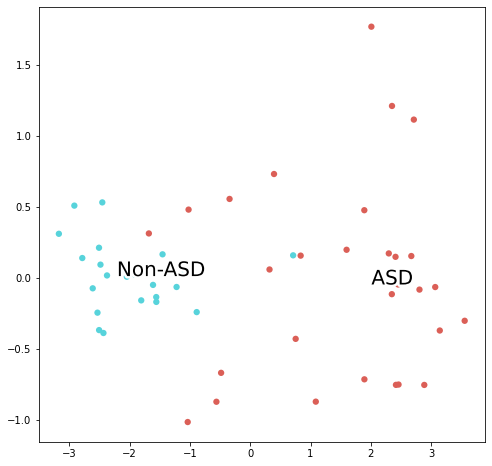

In [8]:
# Visualising PCA

components = pca_stats[['PCA Component 1', 'PCA Component 2']]

# Plotting scatter plot
scatter(components.values, groups)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-5.966506, -58.500645, 'ASD'), Text(7.314875, 51.151863, 'Non-ASD')])

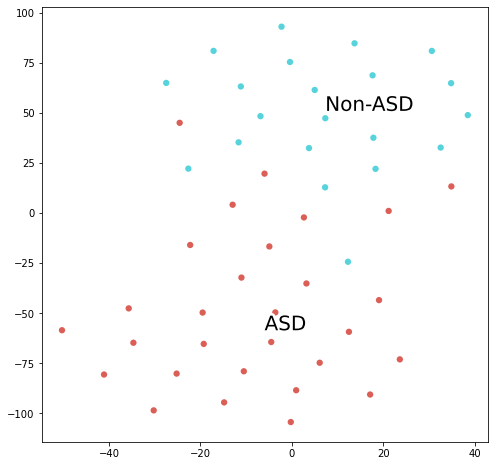

In [9]:
# Visualising t-SNE on standardised data

scatter(tSNE, groups)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-51.798508, 9.863752, 'ASD'), Text(80.18008, -21.78344, 'Non-ASD')])

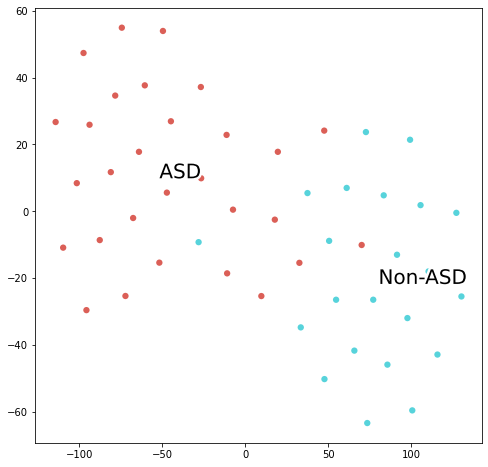

In [10]:
# Visualising t-SNE on data initialised by PCA

scatter(pca_tSNE, groups)